In [104]:
#importing libraries

import random as rd
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import rsa
import numpy as np


In [105]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0


#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates = []


In [106]:
def initVariables(E,C):
    global numberOfExperts, numberOfCandidates
    numberOfExperts, numberOfCandidates = E, C


In [107]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 


In [108]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

In [109]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates[0])):
        sum = 0
        for j in range(len(marksToCandidates)):
            sum = sum + marksToCandidates[j][i][0]
        # print(sum)
        array.append(sum)
    return array


In [110]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [111]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks():
    global marksToCandidates
    marksToCandidates = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = rd.randint(0,10)
            marksToCandidates[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

In [112]:
def runSimulation(experts,candidates,flag):
    experts = experts
    timeList = []
    candidates = candidates
    totalTime = 0
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i])
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  t1 + (t2 / experts) + t3
            timeList.append(totalTime)
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates)
            generateRSAKeys()
            end = timer()
            t1 = end - start
            t2 = expertFunctionToGiveMarks()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = t1 + (t2 / experts[i]) + t3
            timeList.append(totalTime)
    return (timeList)

In [113]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag):
    timeMatrix = []
    for i in range(0,50):
        timeList= runSimulation(experts, candidates,flag)
        timeMatrix.append(timeList)
    # print(timeMatrix)        
    arr = np.array(timeMatrix, dtype='float32')
    # print(arr)
    columns_average = arr.mean(axis=0)

    if flag == "candidates":
        plt.title("number of experts " + str(experts) )
        plt.xlabel("number Of Candidates")
        plt.ylabel("Average Execution Time")   
        plt.bar(candidates, columns_average)
        plt.show()
        print(columns_average)
    else :
        plt.title("number of candidates " + str(candidates))
        plt.xlabel("number Of Experts")
        plt.ylabel("Average Execution Time")   
        plt.bar(experts, columns_average)
        plt.show()
        print(columns_average)
    
    return columns_average

        

In [114]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average
    

In [115]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag):
    column_average = averageTimeConsumedFunction(experts,candidates,flag)
    return column_average

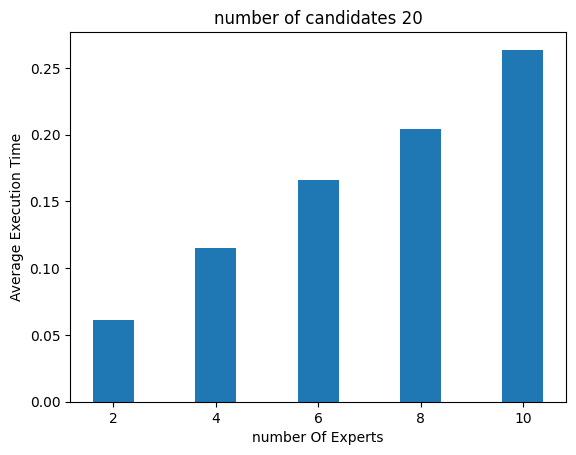

[0.06112393 0.11552387 0.16589576 0.20415968 0.26368657]


In [116]:
time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10],20,"experts")

In [117]:
F1Time = []
F1Time = time

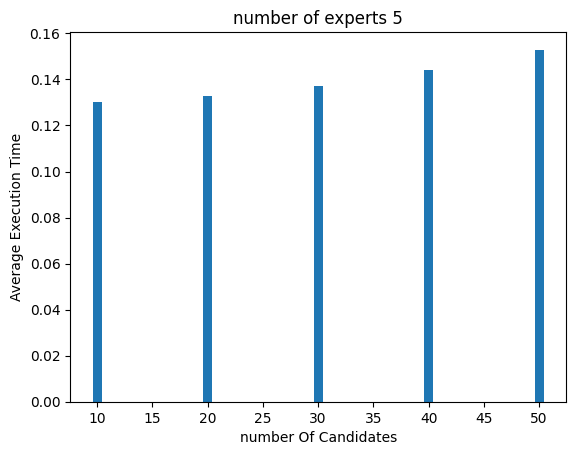

[0.13030486 0.13301148 0.13701911 0.14422692 0.15290406]


In [124]:
time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates")
F1TimeCandidateVariable = []
F1TimeCandidateVariable = time

In [135]:
%store -r F2Time
%store -r F3Time
%store -r F4Time
%store -r F2TimeCandidateVariable
%store -r F3TimeCandidateVariable
%store -r F4TimeCandidateVariable

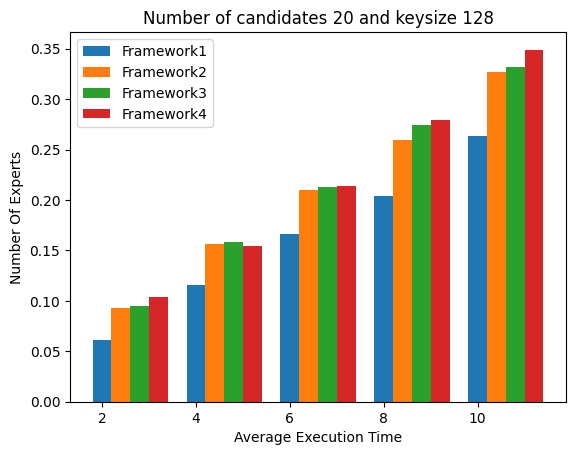

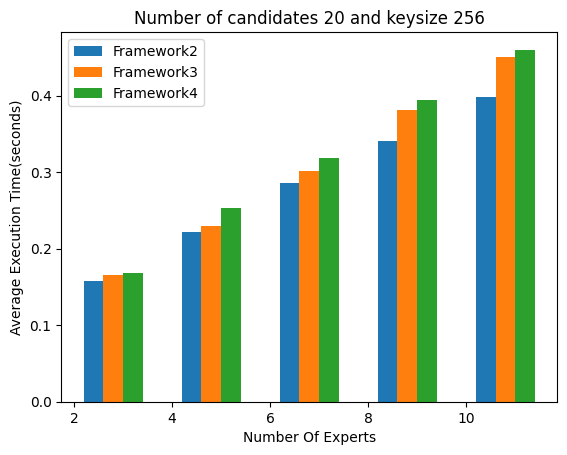

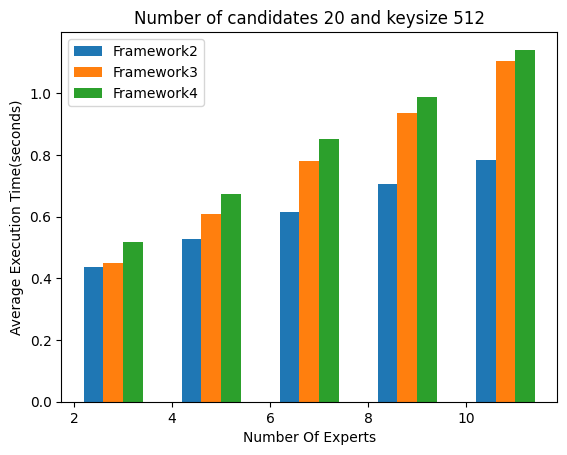

In [120]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1Time, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Average Execution Time") 
        plt.ylabel("Number Of Experts") 
        plt.title("Number of candidates 20 and keysize 128"  ) 
        plt.legend() 
        plt.show()
    else:
        
        plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

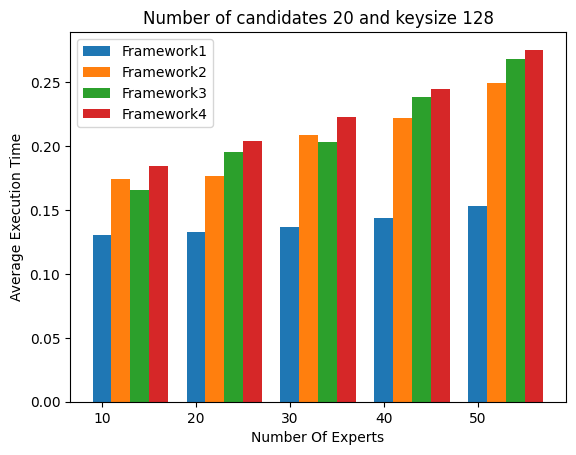

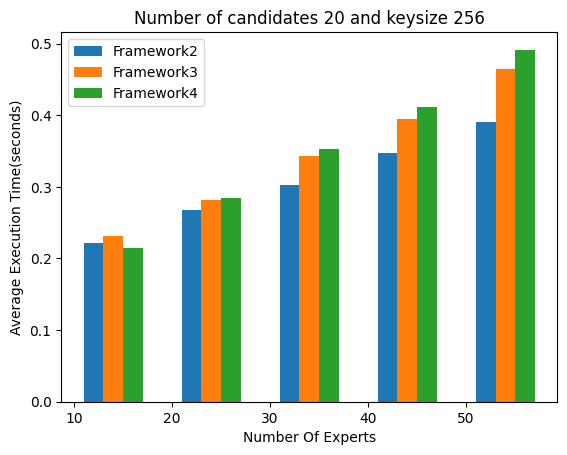

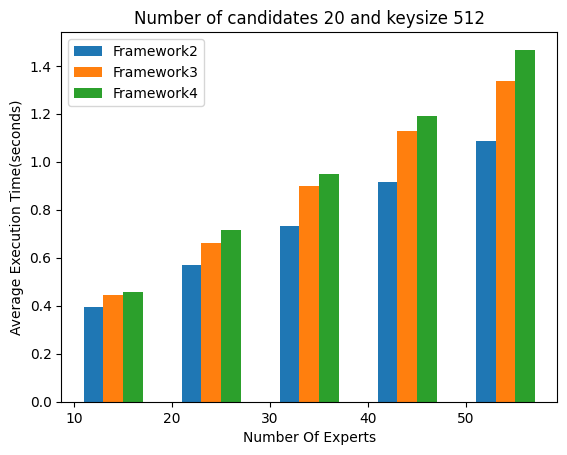

In [143]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    
    if i == 0 :
        plt.bar(X_axis , F1TimeCandidateVariable, width, label = 'Framework1') 
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize 128"  ) 
        plt.legend() 
        plt.show()
    else:
        
        plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
        plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
        plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
        
        plt.xticks(X_axis, X) 
        plt.xlabel("Number Of Experts") 
        plt.ylabel("Average Execution Time(seconds)") 
        plt.title("Number of candidates 20 and keysize " + str(128 * (i * 2))) 
        plt.legend() 
        plt.show()

[array([0.16161591, 0.17756258, 0.21423396, 0.22155124, 0.24971892],
       dtype=float32),
 array([0.20857836, 0.27601326, 0.32016686, 0.41016322, 0.4415264 ],
       dtype=float32),
 array([0.4486047, 0.6938808, 0.9298145, 1.1837767, 1.4102975],
       dtype=float32)]

[0.06112393 0.11552387 0.16589576 0.20415968 0.26368657]
[0.13030486 0.13301148 0.13701911 0.14422692 0.15290406]


In [140]:
print(F1Time)
print(F2Time)
print(F3Time)
print(F4Time)

[0.06112393 0.11552387 0.16589576 0.20415968 0.26368657]
[array([0.09253781, 0.1562677 , 0.20977007, 0.25989053, 0.3274181 ],
      dtype=float32), array([0.15802348, 0.22150399, 0.286248  , 0.34102675, 0.3978417 ],
      dtype=float32), array([0.43821058, 0.5272196 , 0.61647385, 0.707099  , 0.78326344],
      dtype=float32)]
[array([0.0950178 , 0.15867758, 0.2126995 , 0.27457613, 0.3321078 ],
      dtype=float32), array([0.16609721, 0.22994722, 0.30106688, 0.3812895 , 0.45092565],
      dtype=float32), array([0.45081082, 0.6085977 , 0.7790851 , 0.9370379 , 1.1044294 ],
      dtype=float32)]
[array([0.10370366, 0.1544214 , 0.21361065, 0.278893  , 0.34901524],
      dtype=float32), array([0.16848707, 0.25370303, 0.3186162 , 0.39497727, 0.4601202 ],
      dtype=float32), array([0.51928806, 0.67494315, 0.8522319 , 0.9865997 , 1.1413766 ],
      dtype=float32)]


In [142]:
print(F1TimeCandidateVariable)
print(F2TimeCandidateVariable)
print(F3TimeCandidateVariable)
print(F4TimeCandidateVariable)

[0.13030486 0.13301148 0.13701911 0.14422692 0.15290406]
[array([0.17464162, 0.17680742, 0.20917776, 0.22197753, 0.24929203],
      dtype=float32), array([0.22143842, 0.26725045, 0.30222166, 0.34749383, 0.39055452],
      dtype=float32), array([0.39351937, 0.56952465, 0.7330928 , 0.9156622 , 1.0878131 ],
      dtype=float32)]
[array([0.16547215, 0.19583207, 0.20357944, 0.23850578, 0.268619  ],
      dtype=float32), array([0.23098741, 0.28174683, 0.3427064 , 0.39422894, 0.46435887],
      dtype=float32), array([0.44550872, 0.6597827 , 0.8987117 , 1.1287961 , 1.3377485 ],
      dtype=float32)]
[array([0.1844314 , 0.2040472 , 0.22311443, 0.24507979, 0.27558997],
      dtype=float32), array([0.2143033 , 0.28444168, 0.3529921 , 0.4118903 , 0.49135762],
      dtype=float32), array([0.45664874, 0.71676797, 0.9498564 , 1.1927556 , 1.4669706 ],
      dtype=float32)]
